# Integrating connection with GCS and Reading the data:

In [1]:
import vertexai
import os
from dotenv import load_dotenv
import pandas as pd
load_dotenv()
from io import BytesIO
from google.cloud import storage

client = storage.Client()

bucket_name = os.getenv("BUCKET_NAME")
blob_name = os.getenv("blob_name")

bucket = client.bucket(bucket_name)
blob = bucket.blob(blob_name)
contents = blob.download_as_bytes()

df = pd.read_csv(BytesIO(contents))
df.head(5).T



,0,1,2,3,4
Customer_ID,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,7c14ad51-781a-4db9-b7bd-67439c175262,3a73a0e5-d4da-45aa-85f3-528413900a35,7902f4ef-9050-4a79-857d-9c2ea3181940,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9
Customer_Name,Osha Tella,Hredhaan Khosla,Ekani Nazareth,Yamini Ramachandran,Kritika Rege
Gender,Male,Female,Male,Female,Female
Age,60,51,20,57,43
State,Kerala,Maharashtra,Bihar,Tamil Nadu,Punjab
City,Thiruvananthapuram,Nashik,Bhagalpur,Chennai,Amritsar
Bank_Branch,Thiruvananthapuram Branch,Nashik Branch,Bhagalpur Branch,Chennai Branch,Amritsar Branch
Account_Type,Savings,Business,Savings,Business,Savings
Transaction_ID,4fa3208f-9e23-42dc-b330-844829d0c12c,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,e41c55f9-c016-4ff3-872b-cae72467c75c,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,f8e6ac6f-81a1-4985-bf12-f60967d852ef
Transaction_Date,23-01-2025,11-01-2025,25-01-2025,19-01-2025,30-01-2025


# EDA:

In [58]:
import numpy as np
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [59]:
df.describe().astype(int)

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000,200000,200000,200000
mean,44,49538,52437,0
std,15,28551,27399,0
min,18,10,5000,0
25%,31,24851,28742,0
50%,44,49502,52372,0
75%,57,74314,76147,0
max,70,98999,99999,1


In [60]:
df.shape

(200000, 24)

## Checking for missing values & duplicates:

In [61]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [62]:
df.duplicated().sum()

np.int64(0)

### Checking for cardinality of categorical features:

In [63]:
keys = []
dict_uni = {}
for i in range(len(df.columns)):
    k = keys.append(df.columns[i])
    u = len(df.iloc[:,i].unique())
    d = dict_uni.update([(keys[i],u)])


In [64]:
dict_uni

{'Customer_ID': 200000,
 'Customer_Name': 142699,
 'Gender': 2,
 'Age': 53,
 'State': 34,
 'City': 145,
 'Bank_Branch': 145,
 'Account_Type': 3,
 'Transaction_ID': 200000,
 'Transaction_Date': 31,
 'Transaction_Time': 77856,
 'Transaction_Amount': 197978,
 'Merchant_ID': 200000,
 'Transaction_Type': 5,
 'Merchant_Category': 6,
 'Account_Balance': 197954,
 'Transaction_Device': 20,
 'Transaction_Location': 148,
 'Device_Type': 4,
 'Is_Fraud': 2,
 'Transaction_Currency': 1,
 'Customer_Contact': 9000,
 'Transaction_Description': 172,
 'Customer_Email': 4779}

In [65]:
clean_df = df

In [86]:
y = df['Is_Fraud']
fraud_ratio = len(y[y == 0]) / len(y[y == 1])
print(fraud_ratio)

18.825535289452816


In [88]:
class_weight = {
    0: 1,
    1: fraud_ratio * 1.5  
}

print(class_weight)


{0: 1, 1: 28.238302934179224}


### Feature Engineering:

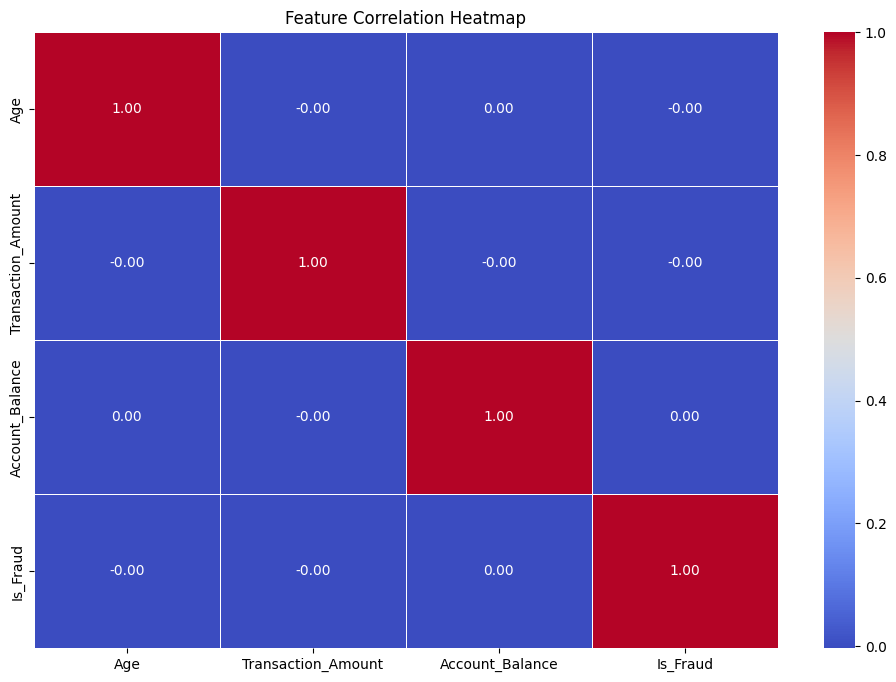

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [67]:
irrelevant_features = ["Customer_ID","Customer_Name","Transaction_ID",
            "Transaction_Date","Transaction_Time","Merchant_ID", 
            "Customer_Contact", "Customer_Email","Transaction_Currency","Transaction_Description"]

df = df.drop(irrelevant_features, axis=1)

In [68]:
df.head(5).T

,0,1,2,3,4
Gender,Male,Female,Male,Female,Female
Age,60,51,20,57,43
State,Kerala,Maharashtra,Bihar,Tamil Nadu,Punjab
City,Thiruvananthapuram,Nashik,Bhagalpur,Chennai,Amritsar
Bank_Branch,Thiruvananthapuram Branch,Nashik Branch,Bhagalpur Branch,Chennai Branch,Amritsar Branch
Account_Type,Savings,Business,Savings,Business,Savings
Transaction_Amount,32415.45,43622.6,63062.56,14000.72,18335.16
Transaction_Type,Transfer,Bill Payment,Bill Payment,Debit,Transfer
Merchant_Category,Restaurant,Restaurant,Groceries,Entertainment,Entertainment
Account_Balance,74557.27,74622.66,66817.99,58177.08,16108.56


In [69]:
keys = []
dict_uni = {}
for i in range(len(df.columns)):
    k = keys.append(df.columns[i])
    u = len(df.iloc[:,i].unique())
    d = dict_uni.update([(keys[i],u)])


In [70]:
dict_uni

{'Gender': 2,
 'Age': 53,
 'State': 34,
 'City': 145,
 'Bank_Branch': 145,
 'Account_Type': 3,
 'Transaction_Amount': 197978,
 'Transaction_Type': 5,
 'Merchant_Category': 6,
 'Account_Balance': 197954,
 'Transaction_Device': 20,
 'Transaction_Location': 148,
 'Device_Type': 4,
 'Is_Fraud': 2}

### Numerical Features & Categorical Features:

In [71]:
catergorical_cols = df.select_dtypes(include=["object"]).columns
print("==="*30)
print("Categorical Features: \n", catergorical_cols)
print("==="*30)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("NUmerical Features: \n",numeric_cols)
print("==="*30)

Categorical Features: 
 Index(['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Type', 'Merchant_Category', 'Transaction_Device',
       'Transaction_Location', 'Device_Type'],
      dtype='object')
NUmerical Features: 
 Index(['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud'], dtype='object')


### Data Exploration and Analysis:

In [72]:
import matplotlib.pyplot as plt
print(df['Is_Fraud'].value_counts())

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64


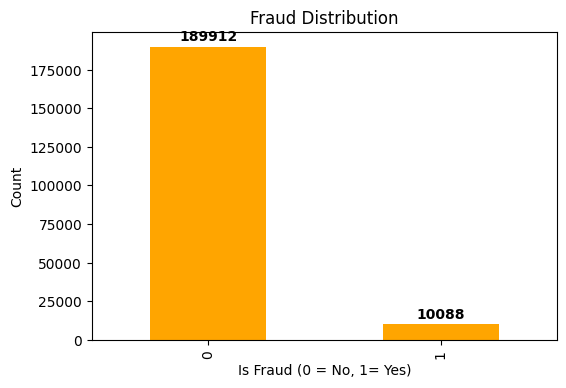

In [73]:
import matplotlib.pyplot as plt

counts = df['Is_Fraud'].value_counts()

ax = counts.plot(kind='bar', color = 'orange', figsize=(6,4))
for i, v in enumerate(counts):
    ax.text(i, v+ counts.max() * 0.01, str(v), ha='center', va='bottom', fontweight ='bold')

plt.title("Fraud Distribution")
plt.xlabel("Is Fraud (0 = No, 1= Yes)") 
plt.ylabel("Count")
plt.show()

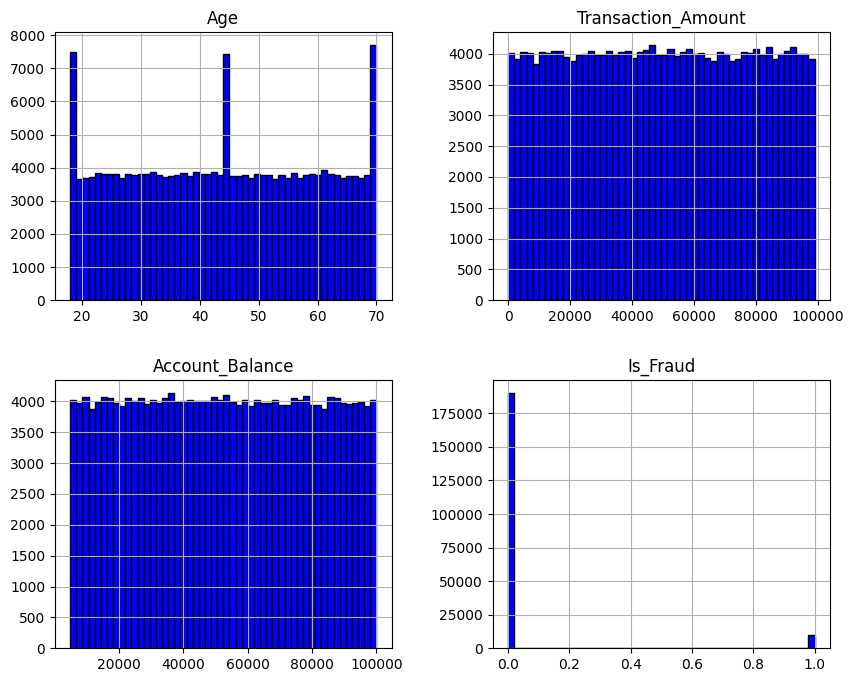

In [74]:
df.hist(bins=50, figsize=(10,8), color = 'blue', edgecolor="black")
plt.show()

### Fraud % vs Transaction Type:

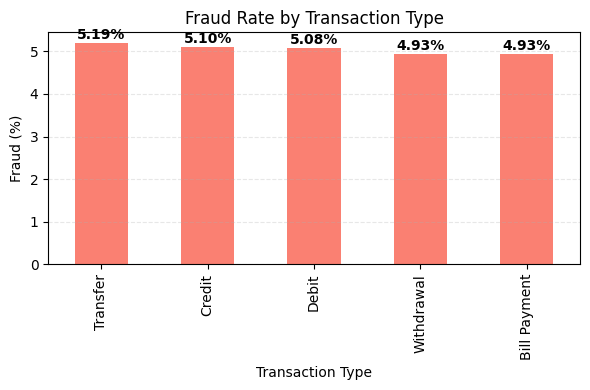

In [75]:
fraud_rate = (df.groupby('Transaction_Type')['Is_Fraud'].mean()*100).sort_values(ascending=False)
ax = fraud_rate.plot(kind='bar', color="Salmon", figsize=(6,4))

max_rate = fraud_rate.max()
offset = max_rate * 0.02
for i, v in enumerate(fraud_rate):
    ax.text(i,v + offset, f'{v:.2f}%', ha='center', fontweight='bold')
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud (%)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Fraud % vs Merchant Category Type:

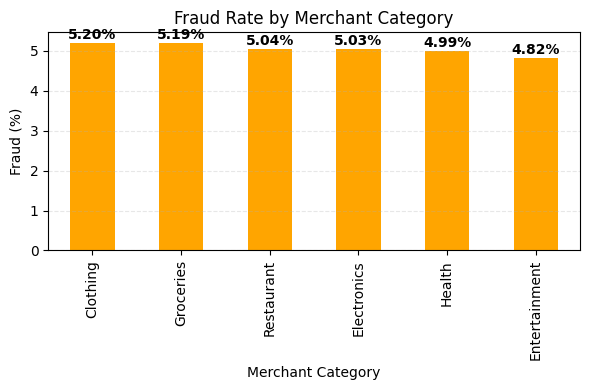

In [76]:
fraud_rate = (df.groupby('Merchant_Category')['Is_Fraud'].mean()*100).sort_values(ascending=False)
ax = fraud_rate.plot(kind='bar', color="orange", figsize=(6, 4))

max_rate = fraud_rate.max()
offset = max_rate * 0.02
for i, v in enumerate(fraud_rate):
    ax.text(i,v + offset, f'{v:.2f}%', ha='center', fontweight='bold')
plt.title("Fraud Rate by Merchant Category")
plt.xlabel("Merchant Category")
plt.ylabel("Fraud (%)") 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Fraud % vs Transaction Device Type:

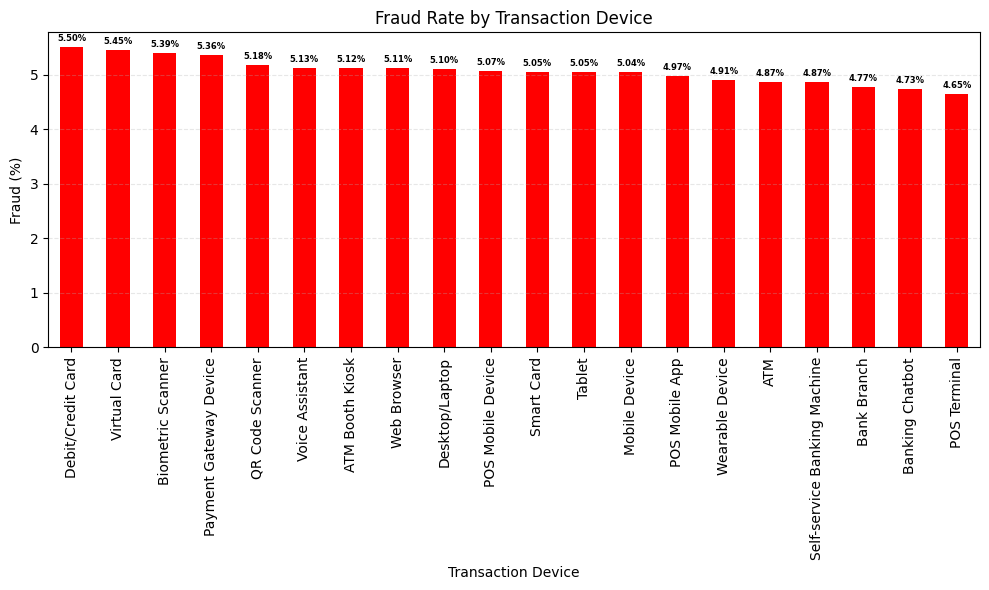

In [77]:
fraud_rate = (df.groupby('Transaction_Device')['Is_Fraud'].mean()*100).sort_values(ascending=False)
ax = fraud_rate.plot(kind='bar', color="red", figsize=(10, 6))

max_rate = fraud_rate.max()
offset = max_rate * 0.02
for i, v in enumerate(fraud_rate):
    ax.text(i,v + offset, f'{v:.2f}%', ha='center', fontweight='bold', fontsize=6)
plt.title("Fraud Rate by Transaction Device")
plt.xlabel("Transaction Device")
plt.ylabel("Fraud (%)") 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Fraud % vs Account Type:

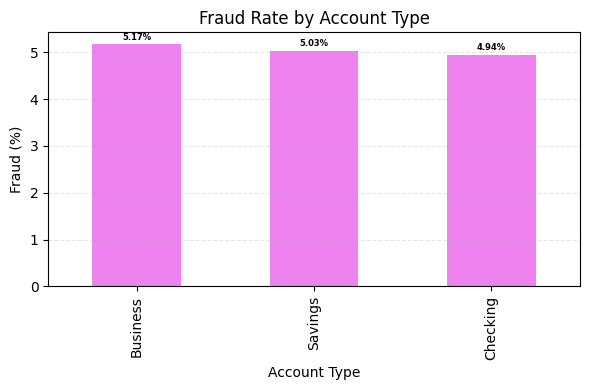

In [78]:
fraud_rate = (df.groupby('Account_Type')['Is_Fraud'].mean()*100).sort_values(ascending=False)
ax = fraud_rate.plot(kind='bar', color="violet", figsize=(6, 4))

max_rate = fraud_rate.max()
offset = max_rate * 0.02
for i, v in enumerate(fraud_rate):
    ax.text(i,v + offset, f'{v:.2f}%', ha='center', fontweight='bold', fontsize=6)
plt.title("Fraud Rate by Account Type")
plt.xlabel("Account Type")
plt.ylabel("Fraud (%)") 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

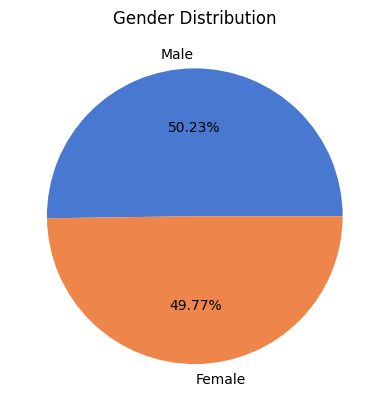

In [79]:
import seaborn as sns
gender_data = df.Gender.value_counts()
colors = sns.color_palette("muted")
plt.pie(gender_data,labels=gender_data.index,autopct='%1.2f%%',colors=colors)
plt.title("Gender Distribution")
plt.show()

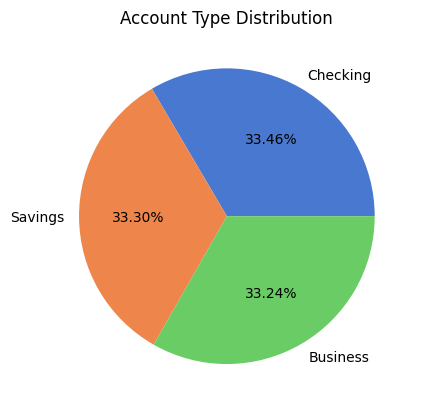

In [80]:
accountt_data = df.Account_Type.value_counts()
colors = sns.color_palette("muted")
plt.pie(accountt_data,labels=accountt_data.index,autopct='%1.2f%%',colors=colors)
plt.title("Account Type Distribution")
plt.show()

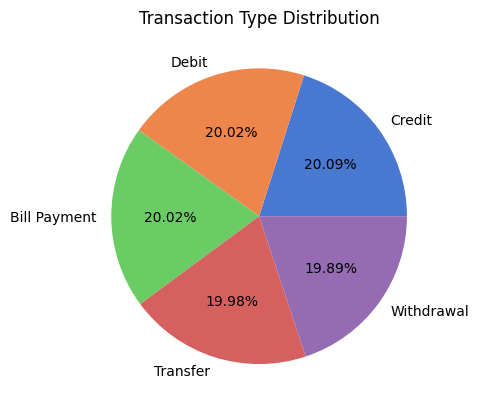

In [81]:
transaction_data = df.Transaction_Type.value_counts()
colors = sns.color_palette("muted")
plt.pie(transaction_data,labels=transaction_data.index,autopct='%1.2f%%',colors=colors)
plt.title("Transaction Type Distribution")
plt.show()

In [82]:
clean_df['Transaction_Date'] = pd.to_datetime(clean_df['Transaction_Date'], dayfirst=True)
clean_df['day_of_week'] = clean_df['Transaction_Date'].dt.dayofweek
clean_df['is_weekend'] = clean_df['day_of_week'].isin([5,6]).astype(int)
clean_df['Transaction_Time'] = pd.to_datetime(clean_df['Transaction_Time'], format='%H:%M:%S')
clean_df['hour'] = clean_df['Transaction_Time'].dt.hour

# Feature Selection:
irrelevant_features = ["Customer_ID","Customer_Name","Transaction_ID",
            "Transaction_Date","Transaction_Time","Merchant_ID", 
            "Customer_Contact", "Customer_Email","Transaction_Currency","Transaction_Description"]
clean_df = clean_df.drop(irrelevant_features, axis=1)

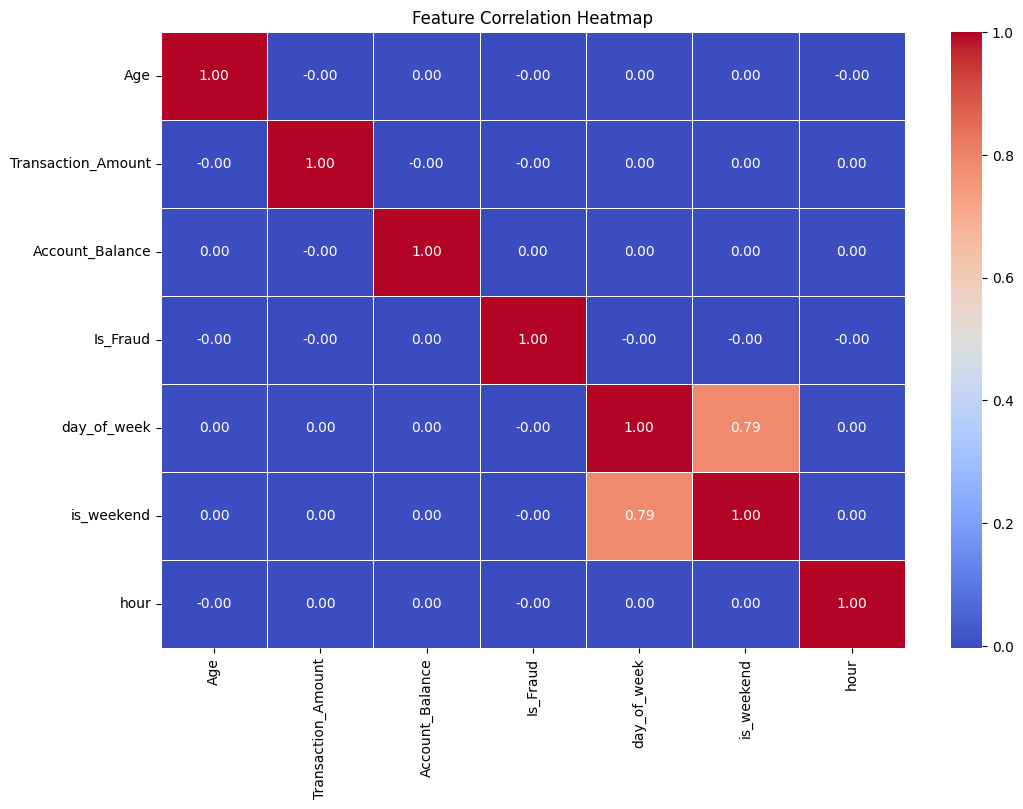

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = clean_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [2]:
import vertexai
import os
from dotenv import load_dotenv
import pandas as pd
load_dotenv()
from io import BytesIO
from google.cloud import storage

client = storage.Client()

bucket_name = os.getenv("BUCKET_NAME")
blob_name = "preprocessed_data/train.csv"

bucket = client.bucket(bucket_name)
blob = bucket.blob(blob_name)
contents = blob.download_as_bytes()

clean_df = pd.read_csv(BytesIO(contents))
clean_df.head(5).T



,0,1,2,3,4
onehot__Gender_Female,0.000000,0.000000,0.000000,1.000000,0.000000
onehot__Gender_Male,1.000000,1.000000,1.000000,0.000000,1.000000
onehot__Account_Type_Business,1.000000,1.000000,0.000000,1.000000,1.000000
onehot__Account_Type_Checking,0.000000,0.000000,1.000000,0.000000,0.000000
onehot__Account_Type_Savings,0.000000,0.000000,0.000000,0.000000,0.000000
onehot__Transaction_Type_Bill Payment,1.000000,0.000000,1.000000,0.000000,0.000000
onehot__Transaction_Type_Credit,0.000000,0.000000,0.000000,0.000000,0.000000
onehot__Transaction_Type_Debit,0.000000,0.000000,0.000000,0.000000,1.000000
onehot__Transaction_Type_Transfer,0.000000,1.000000,0.000000,1.000000,0.000000
onehot__Transaction_Type_Withdrawal,0.000000,0.000000,0.000000,0.000000,0.000000


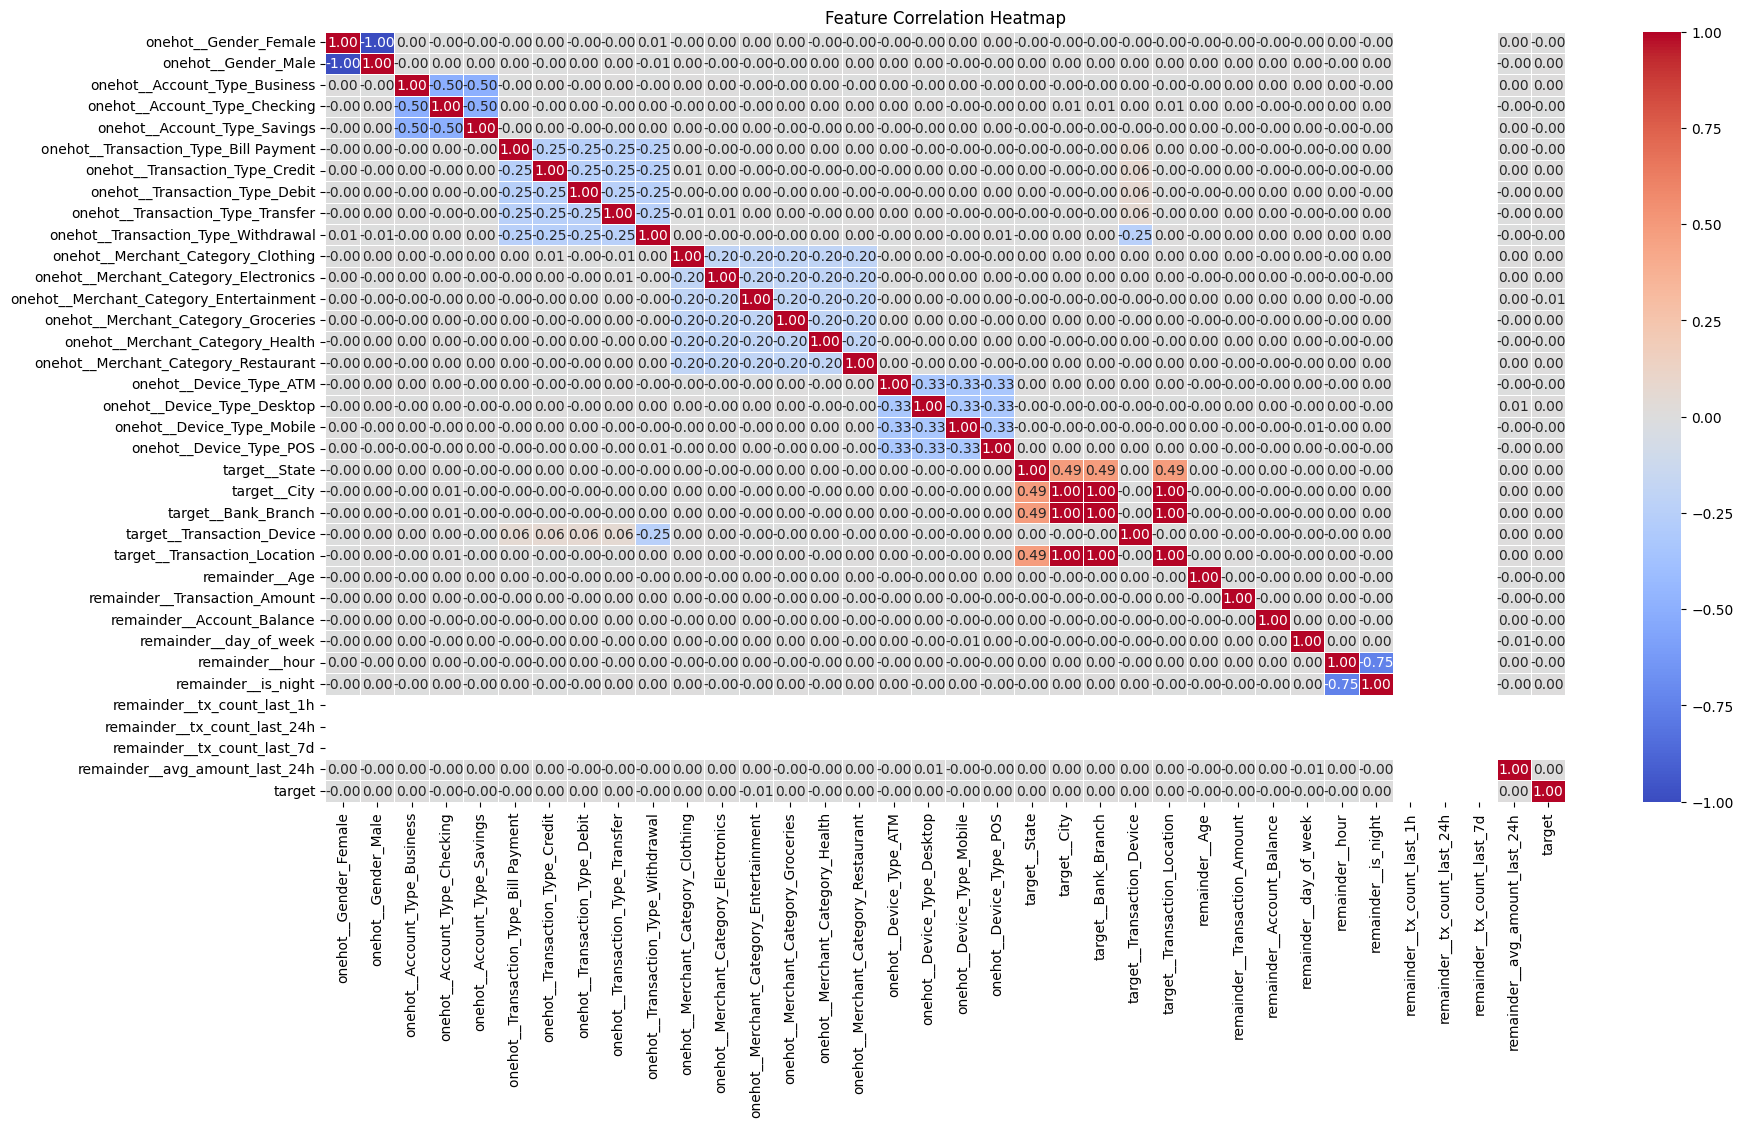

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = clean_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()